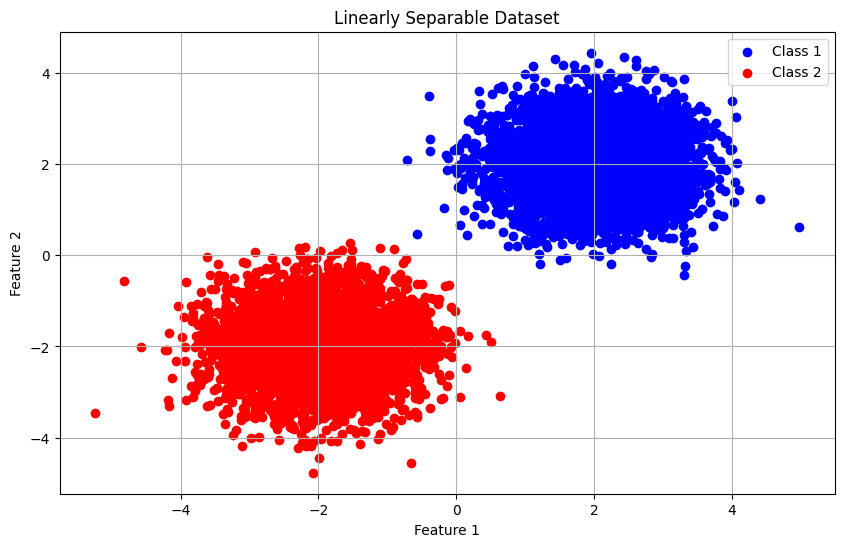

In [1]:
import torch
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define means and covariance matrix
mean1 = torch.tensor([2.0, 2.0])
mean2 = torch.tensor([-2.0, -2.0])
cov = 0.5 * torch.eye(2)

# Generate 5000 samples from each class
dist1 = torch.distributions.MultivariateNormal(mean1, cov)
dist2 = torch.distributions.MultivariateNormal(mean2, cov)
class1 = dist1.sample((5000,))
class2 = dist2.sample((5000,))

# Create labels
labels1 = torch.ones(5000)
labels2 = -torch.ones(5000)

# Combine the data
X = torch.cat((class1, class2), 0)
y = torch.cat((labels1, labels2), 0)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import torch.nn as nn
import torch.optim as optim

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sign(self.fc(x))

class Adaline(nn.Module):
    def __init__(self):
        super(Adaline, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        return self.fc(x)


/tmp/ipykernel_6592/2037712375.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_6592/2037712375.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/tmp/ipykernel_6592/2037712375.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
/tmp/ipykernel_6592/2037712375.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon

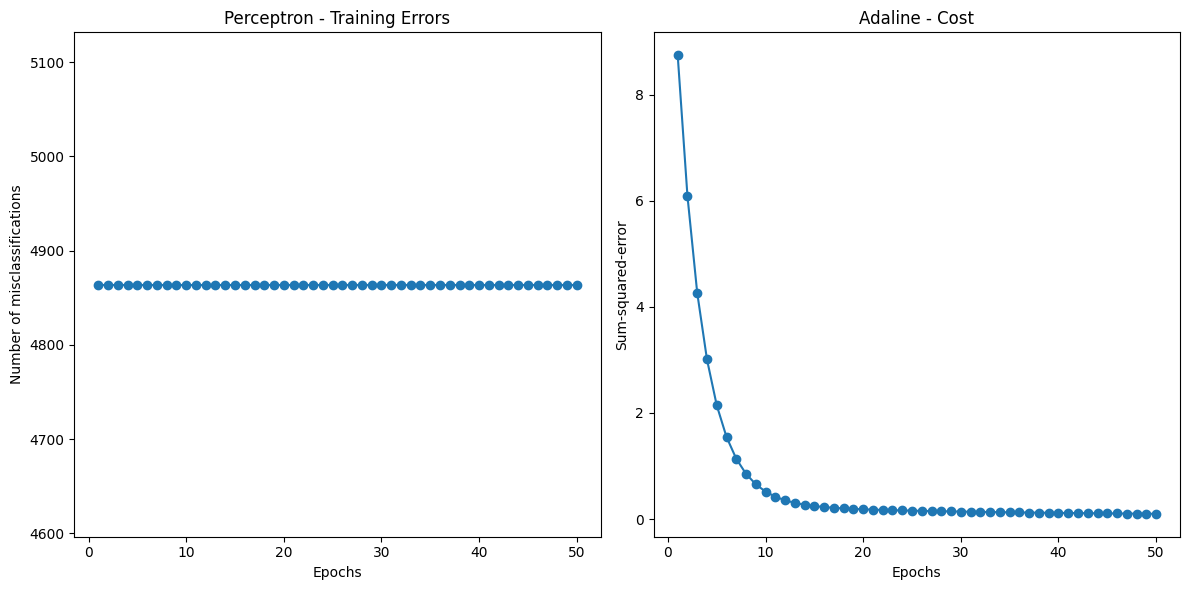

Perceptron Test Accuracy: 0.39
Adaline Test Accuracy: 1.00


In [4]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Train Perceptron
perceptron = Perceptron()
criterion = nn.MSELoss()
optimizer = optim.SGD(perceptron.parameters(), lr=0.01)
epochs = 50
perceptron_errors = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = perceptron(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        predicted = torch.sign(perceptron(X_train))
        errors = (predicted != y_train).sum().item()
        perceptron_errors.append(errors)
    
# Train Adaline
adaline = Adaline()
criterion = nn.MSELoss()
optimizer = optim.SGD(adaline.parameters(), lr=0.01)
adaline_costs = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = adaline(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        cost = loss.item()
        adaline_costs.append(cost)

# Plot training errors and costs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(perceptron_errors) + 1), perceptron_errors, marker='o')
plt.title('Perceptron - Training Errors')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(adaline_costs) + 1), adaline_costs, marker='o')
plt.title('Adaline - Cost')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

# Evaluate the models
with torch.no_grad():
    y_pred_perceptron = torch.sign(perceptron(X_test))
    y_pred_adaline = torch.sign(adaline(X_test))

    accuracy_perceptron = (y_pred_perceptron == y_test).float().mean().item()
    accuracy_adaline = (y_pred_adaline == y_test).float().mean().item()

print(f'Perceptron Test Accuracy: {accuracy_perceptron:.2f}')
print(f'Adaline Test Accuracy: {accuracy_adaline:.2f}')